## Introducción a la Visión Computacional
## Tarea 1
-----------------------
<div align="right">
Fecha de Entrega: Viernes 8 de abril 2022.
</div>

1. Buscar una base de datos (dataset) de imágenes abierta. Por ejemplo, de Kaggle (https://www.kaggle.com/datasets?tags=13207-Computer+Vision). Si dispone de una base de datos propia (o tiene acceso a alguna no pública), también  puede ser utilizada. Hacer una breve descripción de esta base de datos: número de fotos, sensor con el cual fue obtenido, condiciones ambientales, tipos de elementos que aparecen (automóviles, animales, insectos, caras, entre otros)

2. Buscar una aplicación interesante para ese conjunto de imágenes. Se debe justificar en un párrafo el por qué es una aplicación que valga la pena implementar o realizar. La aplicación requeriría detectar o medir algo y en forma automatizada dentro de cada imagen.

3. Hacer pre-procesamiento simple:
    + Implementar un código que realice en forma masiva un cambio de resolución de las imágenes (por ejemplo unas 100 a una resolución menor, por ejemplo, 256x256 o 512x512). Para ello, las imágenes fuente deben estar en un directorio y las de salida en uno diferente.
    + Implementar un código que filtre (por ejemplo, gaussiano) las imágenes y las deje en un nuevo directorio.


Debe documentar en un breve informe lo realizado: puede ser en formato pdf, o bien en un notebook.

Más importante que mostrar la totalidad de lo procesado, es mostrar solamente algunos casos que sean ilustrativos, junto con algunos específicos que se no se ajusten al común o promedio de los resultados. Tan importante como mostrar estos resultados mencionados, son los comentarios de la particularidad que tienen los casos a reportar.

## Base de datos

La base de datos es de origen propio y fue obtenida durante la realización de un evento de trail running desarrollado en Chamonix, Francia en agosto de 2017. La base de datos cuenta con 93 fotografías totales y corresponden al momento de la largada de carrera. La cámara con que se obtuvo estas fotografías es una Sony Alpha 6400, con un sensor CMOS y un lente de 50mm. Las condiciones de luz corresponden a luz natural de un día nublado entre 17 y 18 horas. Los elementos principales que aparence son personas corriendo en primer plano portando un dorsal con su numero de corredor. En segundo plano es posible ver espectadores, edificios, cielo y alguno que otro cerro.

## Aplicación

Se busca identificar los números de dorsales de corredor con el fin de poder clasificar el total de fotografías que corresponden a cada persona, son el fin de luego poder buscar fácilmente las fotografías y poder venderlas en una web, con tan solo ingresar el número de corredor que corresponda.

**Tareas**
- Identificar dorsal de corredor
- Identificar el número que pertenece al dorsal del corredor

## Preprocesamiento

In [1]:
import pandas as pd
import numpy as np

In [23]:
import os

In [18]:
import cv2

In [2]:
from numpy import *

In [3]:
from PIL import Image

Abrir una imagen

In [4]:
pil_im = Image.open('data/MBR07829.jpg')
pil_im.show()

Convertirla a escala de grises

In [5]:

pil_im_grey = Image.open('data/MBR07829.jpg').convert('L')
pil_im_grey.show()

Error: no "view" mailcap rules found for type "image/png"
Start : Este comando no se puede ejecutar debido al error: El sistema no puede encontrar el archivo especificado.


### Obtener una lista de las imagenes .png dentro de un directorio

In [6]:
def get_imlist(path):
    """ Retorna la lista de todos los archivos.png en un directorio. """
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]


filelist=get_imlist('data/')
filelist

['data/MBR07829.jpg',
 'data/MBR07830.jpg',
 'data/MBR07831.jpg',
 'data/MBR07832.jpg',
 'data/MBR07833.jpg',
 'data/MBR07834.jpg',
 'data/MBR07835.jpg',
 'data/MBR07836.jpg',
 'data/MBR07837.jpg',
 'data/MBR07838.jpg',
 'data/MBR07839.jpg',
 'data/MBR07840.jpg',
 'data/MBR07841.jpg',
 'data/MBR07842.jpg',
 'data/MBR07843.jpg',
 'data/MBR07844.jpg',
 'data/MBR07845.jpg',
 'data/MBR07846.jpg',
 'data/MBR07847.jpg',
 'data/MBR07848.jpg',
 'data/MBR07849.jpg',
 'data/MBR07850.jpg',
 'data/MBR07851.jpg',
 'data/MBR07852.jpg',
 'data/MBR07853.jpg',
 'data/MBR07854.jpg',
 'data/MBR07855.jpg',
 'data/MBR07856.jpg',
 'data/MBR07857.jpg',
 'data/MBR07858.jpg',
 'data/MBR07859.jpg',
 'data/MBR07860.jpg',
 'data/MBR07861.jpg',
 'data/MBR07862.jpg',
 'data/MBR07863.jpg',
 'data/MBR07864.jpg',
 'data/MBR07865.jpg',
 'data/MBR07866.jpg',
 'data/MBR07867.jpg',
 'data/MBR07868.jpg',
 'data/MBR07869.jpg',
 'data/MBR07870.jpg',
 'data/MBR07871.jpg',
 'data/MBR07872.jpg',
 'data/MBR07873.jpg',
 'data/MBR

## Tamaño original

El tamaño original de las imágenes es de:

In [7]:
pil_im.size

(6000, 4000)

## Cambio de resolución

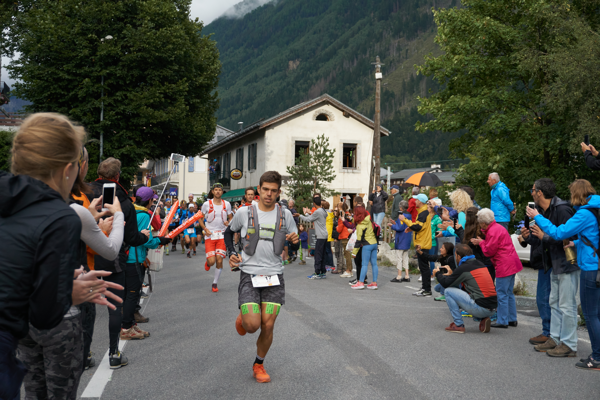

In [8]:
pil_im.resize((600,400))

### Proceso masivo de cambio de resolución

In [9]:
size_out = (600,400)

In [10]:
out_path = 'out_resized'

Cambiando resolución a 600X400 y guardando en la carpeta out_resized

In [11]:
for file in filelist:
    pil_im = Image.open(file).convert('L')
    im_resized = pil_im.resize(size_out)
    im_resized.save(out_path+'/'+'resized_'+file.split('/')[1], 'JPEG')

## Aplicando filtro gaussiano

In [12]:
from scipy.ndimage import filters

In [13]:
import matplotlib.pyplot as plt

In [14]:
plt.rcParams['figure.figsize'] = (16,8)

In [15]:
im = array(Image.open(file).convert('L'), 'f')
sigma = 10 #Desviacion estandar
imx_g = zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (0,1), imx_g)
imy_g= zeros(im.shape)
filters.gaussian_filter(im, (sigma,sigma), (1,0), imy_g)

array([[ 0.00022885,  0.00022873,  0.00022853, ...,  0.00118675,
         0.00119559,  0.00119997],
       [ 0.00067575,  0.00067538,  0.00067478, ...,  0.00354598,
         0.00357231,  0.00358535],
       [ 0.00108554,  0.00108504,  0.00108428, ...,  0.00585134,
         0.00589454,  0.00591593],
       ...,
       [-0.0493944 , -0.04927983, -0.04905259, ..., -0.19655513,
        -0.19321187, -0.19151793],
       [-0.03005835, -0.02998833, -0.0298494 , ..., -0.11757879,
        -0.11557128, -0.11455418],
       [-0.01009069, -0.01006714, -0.0100204 , ..., -0.03913527,
        -0.03846586, -0.03812672]])

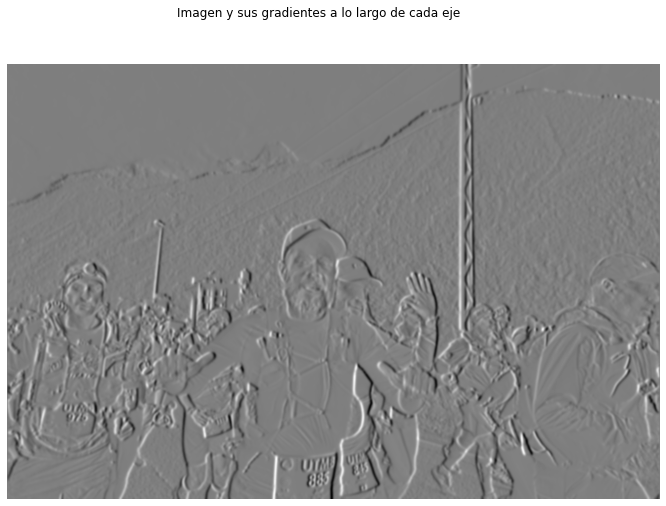

In [16]:
# Dibujando
plt.close("all")
plt.figure()
plt.suptitle("Imagen y sus gradientes a lo largo de cada eje")
ax = plt.subplot()
ax.axis("off")
ax.imshow(imx_g, cmap = plt.get_cmap('gray'))

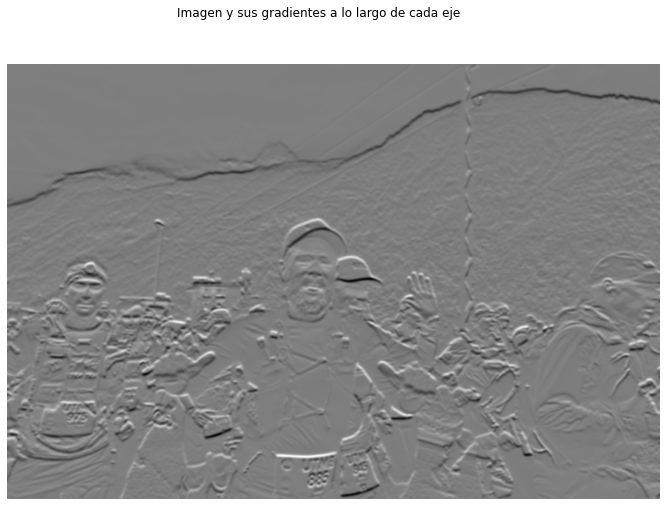

In [17]:
# Dibujando
plt.close("all")
plt.figure()
plt.suptitle("Imagen y sus gradientes a lo largo de cada eje")
ax = plt.subplot()
ax.axis("off")
ax.imshow(imy_g, cmap = plt.get_cmap('gray'));

In [20]:
filelist=get_imlist('out_resized/')

In [21]:
out_path = 'out_gauss'

In [22]:
for file in filelist:
    im = array(Image.open(file).convert('L'), 'f')
    sigma = 10 #Desviacion estandar
    imx_g = zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), imx_g)
    imy_g= zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (1,0), imy_g)
    cv2.imwrite(out_path+'/'+'x_'+file.split('/')[1], imx_g)
    cv2.imwrite(out_path+'/'+'y_'+file.split('/')[1], imx_g)

Hasta aqui logré guardar las imágenes pero se produce mucha perdida de información y las imágenes quedan oscuras